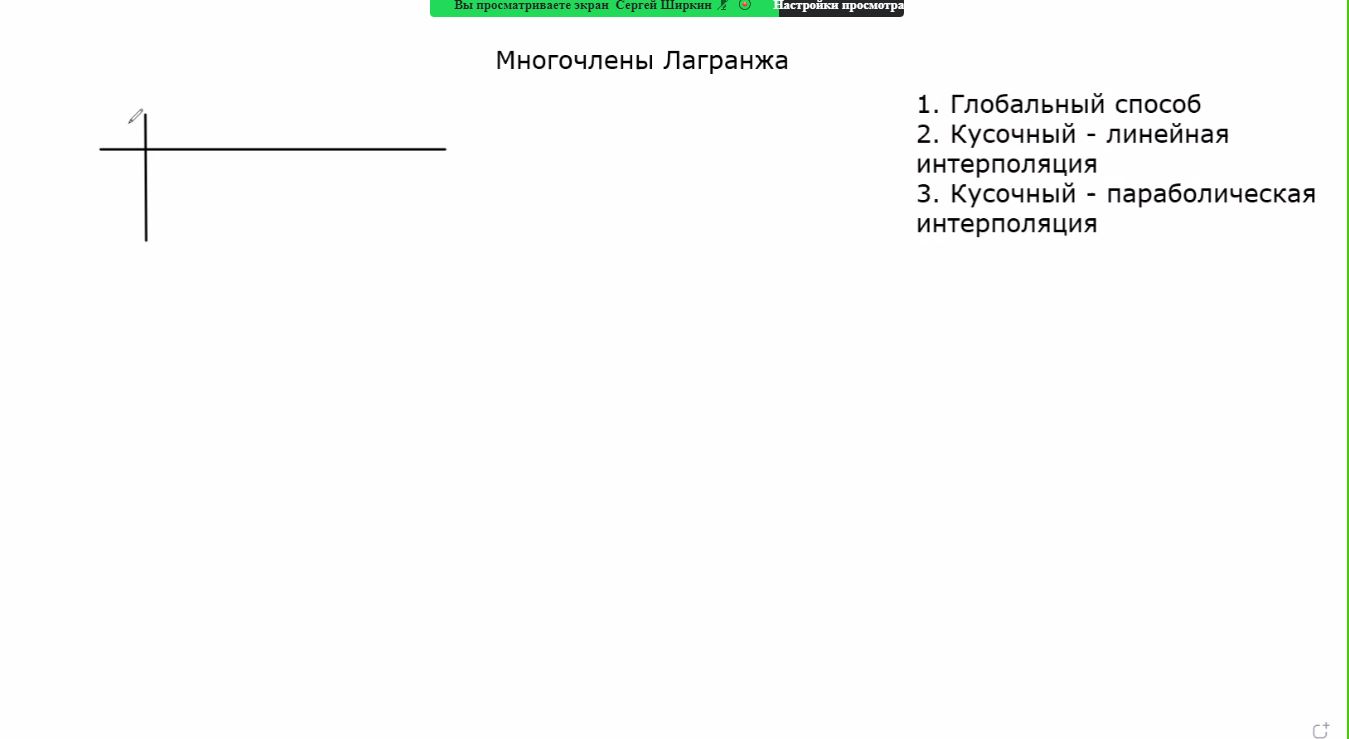

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Глобальная интерполяция

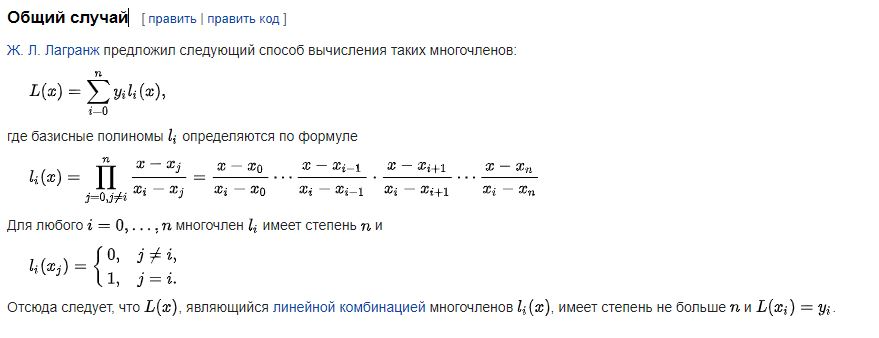

In [26]:
def create_basic_polynom(x_val: list, i: int):
    def basic_polynom(x):
        div = 1
        res = 1
        for j in range(len(x_val)):
            if j != i:
                res *= (x - x_val[j])
                div *= (x_val[i] - x_val[j])
        return res/div
    return basic_polynom

def create_Lagrange_polynom(x_val: list, y_val: list):
    basic_polynoms = []
    for i in range(len(x_val)):
        basic_polynoms.append(create_basic_polynom(x_val, i))
    
    def lagrange_poly(x):
        result = 0
        for i in range(len(y_val)):
            result += y_val[i]*basic_polynoms[i](x)
        return result
    return lagrange_poly

x_vals = [0, 10, 4, 19]
y_vals = [0, 5, 3, 2]

lagrange_pol = create_Lagrange_polynom(x_vals, y_vals)

for x in x_vals:
    print("x = {:4f}\t y = {:4f}".format(x, lagrange_pol(x)))

x = 0.000000	 y = 0.000000
x = 10.000000	 y = 5.000000
x = 4.000000	 y = 3.000000
x = 19.000000	 y = 2.000000


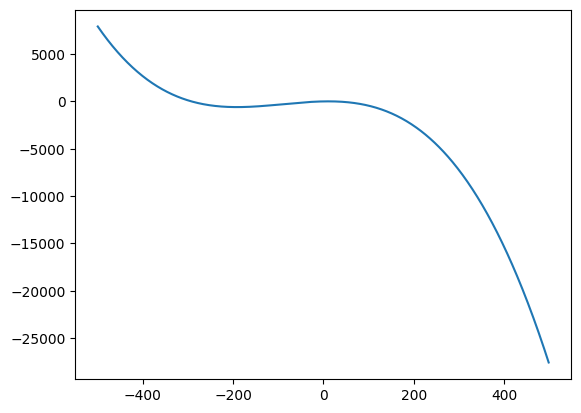

In [28]:
x = []
y = []
graph_len = 1000
for i in range(graph_len):
    x.append(i-graph_len//2)
for i in range(graph_len):
    y.append(lagrange_pol(x[i]))
plt.plot(x, y)
plt.show()

## Линейная интерполяция

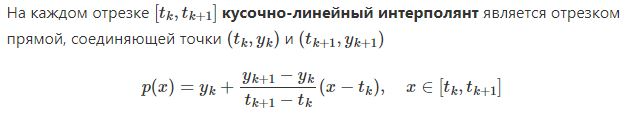

In [29]:
def two_points_interpolation(x1, y1, x2, y2, x):
    y = (y2 - y1)*(x - x1)/(x1 - x2) + y1
    return y

def linear_interpolation(x_vals, y_vals, x):
    for i in range(len(x_vals) - 1):
        if x_vals[i] <= x and x <= x_vals[i+1]:
            x1 = x_vals[i]
            y1 = y_vals[i]
            x2 = x_vals[i+1]
            y2 = y_vals[i+1]
            return two_points_interpolation(x1, y1, x2, y2, x)
    return None


x_vals = [-100, -10, -5, 0, 1, 2, 30, 100]
y_vals = [0, -5, 60, 3, 0, -3, -1, 50]

x = 70

y = linear_interpolation(x_vals, y_vals, x)

print(y)

-30.142857142857142


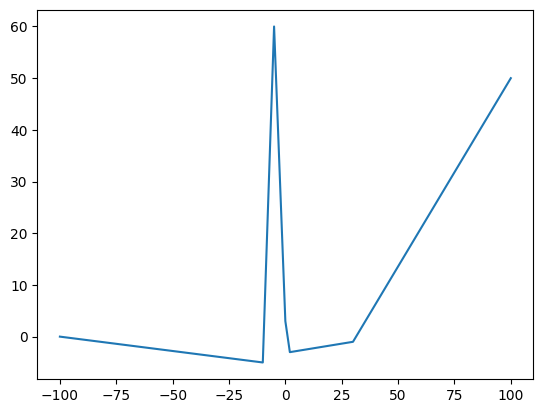

In [30]:
plt.plot(x_vals, y_vals)
plt.show()

## Параболическая интерполяция

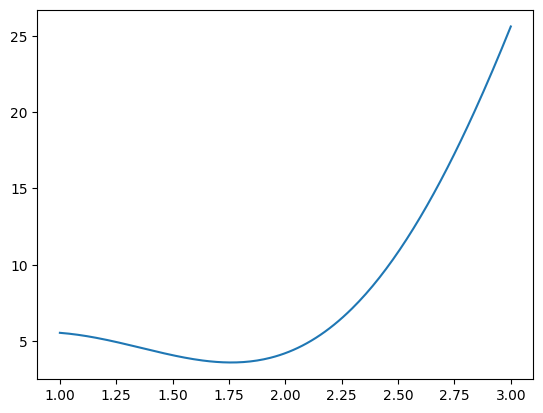

In [38]:
def complicated_func(x):
    return x * x * x + 5 * math.sin(2 * x)


def parabolic_search(f, a, b, epsilon=1e-1):
    h = (b - a) / 2
    s0 = a
    s1 = a + h
    s2 = b
    f0 = f(s0)
    f1 = f(s1)
    f2 = f(s2)
    h_mean = (4 * f1 - 3 * f0 - f2) / (2 * (2 * f1 - f0 - f2)) * h
    s_mean = s0 + h_mean
    f_mean = f(s_mean)

    k = 0
    while s2 - s0 > epsilon:
        h = (s2 - s0) / 2
        h_mean = (4 * f1 - 3 * f0 - f2) / (2 * (2 * f1 - f0 - f2)) * h
        s_mean = s0 + h_mean
        f_mean = f(s_mean)
        if f1 <= f_mean:
            if s1 < s_mean:
                s2 = s_mean
                f2 = f_mean
                s1 = (s2 + s0)/2
                f1 = f(s1)
            else:
                s0 = s_mean
                f0 = f_mean
                s1 = (s2 + s0)/2
                f1 = f(s1)
        else:
            if s1 > s_mean:
                s2 = s1
                s1 = s_mean
                f2 = f1
                f1 = f_mean
            else:
                s0 = s1
                s1 = s_mean
                f0 = f1
                f1 = f_mean
        print(k)
        k += 1
    return s_mean, f_mean



x = np.linspace(1, 3, 200)
y = []
index = 0
for i in x:
    y.append(complicated_func(x[index]))
    index += 1
plt.plot(x, y)
plt.show()